In [1]:
import numpy as np
import skimage
from skimage import io
from matplotlib import pyplot as plt
from skimage import data
from skimage.transform import resize
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [2]:
noisy_img = io.imread ("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog_noisy.png")
clean_img = io.imread ("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog.png")

### v1

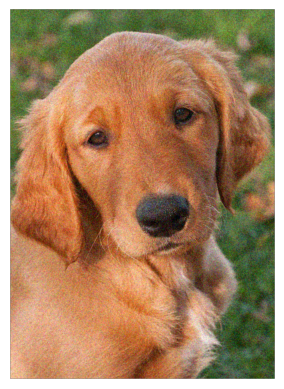

PSNR value is 3.53415348860678


/var/folders/n1/t3hm6b612gg69mlfjrdv4ht00000gn/T/ipykernel_7559/225274667.py:37: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("PSNR value is {}".format(peak_signal_noise_ratio(clean_img, filtered_image)))


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to apply median filter to a grayscale image
def median_filter(image, kernel_size):
    height, width, channels = image.shape
    pad_size = kernel_size // 2
    filtered_image = np.zeros_like(image)
    
    for c in range(channels):
        for i in range(pad_size, height - pad_size):
            for j in range(pad_size, width - pad_size):
                window = image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1, c]
                median_value = np.median(window)
                filtered_image[i, j, c] = median_value
    
    return filtered_image

# Function to load and apply median filter to a color image
def apply_median_filter_to_color_image(image_path, kernel_size):
    # Load the color image using matplotlib
    image = plt.imread(image_path)
    
    # Apply median filter to each color channel
    filtered_image = median_filter(image, kernel_size)
    
    return filtered_image

# Apply median filter to the uploaded color image with a kernel size of 3 (as an example)
filtered_image = apply_median_filter_to_color_image("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog_noisy.png", 3)

# Display the filtered color image using matplotlib
plt.imshow(filtered_image)
plt.axis('off')
plt.show()

print("PSNR: {}".format(peak_signal_noise_ratio(clean_img, filtered_image)))

### V2

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt2

# Helper function to apply median filter to a color image
def median_filter_color(image, kernel_size):
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Apply 2D median filter to each channel using scipy
    red_filtered = medfilt2(red_channel, kernel_size)
    green_filtered = medfilt2(green_channel, kernel_size)
    blue_filtered = medfilt2(blue_channel, kernel_size)

    # Merge the filtered channels back into a color image
    filtered_image = np.stack((red_filtered, green_filtered, blue_filtered), axis=-1)

    return filtered_image

# Function to load and apply median filter to a color image
def apply_median_filter_to_color_image(image_path, kernel_size):
    # Load the color image using matplotlib
    image = plt.imread(image_path)

    # Ensure that the image data is in the range [0, 1]
    image = image.astype(np.float32) / 255.0

    # Apply median filter to the color image
    filtered_image = median_filter_color(image, kernel_size)

    return filtered_image

# Apply median filter to the uploaded color image with a kernel size of 3 (as an example)
filtered_image = apply_median_filter_to_color_image('/mnt/data/color_image.png', 3)

# Display the filtered color image using matplotlib
plt.imshow(filtered_image)
plt.axis('off')
plt.show()


ImportError: cannot import name 'medfilt2' from 'scipy.signal' (/Users/jiyoung/Downloads/yes/envs/3.8/lib/python3.8/site-packages/scipy/signal/__init__.py)

### V3

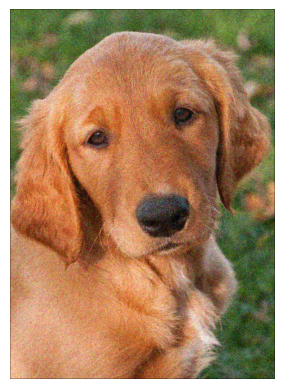

ValueError: Input images must have the same dimensions.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to apply median filter to a grayscale image
def median_filter(image, kernel_size):
    height, width = image.shape
    pad_size = kernel_size // 2
    filtered_image = np.zeros_like(image)

    for i in range(pad_size, height - pad_size):
        for j in range(pad_size, width - pad_size):
            window = image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            median_value = np.median(window)
            filtered_image[i, j] = median_value

    return filtered_image

# Function to load and apply median filter to a color image
def apply_median_filter_to_color_image(image_path, kernel_size):
    # Load the color image using matplotlib
    image = plt.imread(image_path)

    # Separate the color channels
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Apply median filter to each color channel
    red_filtered = median_filter(red_channel, kernel_size)
    green_filtered = median_filter(green_channel, kernel_size)
    blue_filtered = median_filter(blue_channel, kernel_size)

    # Merge the filtered channels back into a color image
    filtered_image = np.stack((red_filtered, green_filtered, blue_filtered), axis=-1)

    return filtered_image

# Apply median filter to the uploaded color image with a kernel size of 3 (as an example)
filtered_image = apply_median_filter_to_color_image("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog_noisy.png", 3)

# Display the filtered color image using matplotlib
plt.imshow(filtered_image)
plt.axis('off')
plt.show()

print("PSNR: {}".format(peak_signal_noise_ratio(clean_img, filtered_image)))
print("SSIM: {}".format(structural_similarity(clean_img, filtered_image, multichannel=True)))